# Course Recommendation System

## Introduction

In an era characterized by the abundance of educational resources and platforms, selecting the right courses that align with an individual's interests and goals can be a daunting task. This project aims to address this challenge by developing a Course Recommendation System.

### Project Overview

The Course Recommendation System is designed to assist learners in discovering relevant and engaging courses from a vast pool of educational offerings. Whether you're a student looking for university courses, a professional seeking to upskill, or simply someone with a thirst for knowledge, our system is tailored to provide you with personalized course recommendations.

### Problem Statement

The primary objective of this project is to create a recommendation engine that can:

- Analyze user preferences, learning history, and other relevant data.
- Suggest courses that are well-suited to the user's interests and objectives.
- Enhance the learning experience by offering a curated list of courses.
- Help users make informed decisions about their educational journey.

### Data Sources

To accomplish our goal, we will leverage diverse data sources, which may include:
- User profiles and preferences.
- Course metadata (titles, descriptions, categories).
- User engagement data (e.g., course views, enrollments, ratings).
- User feedback and reviews.

### Methodology

Our recommendation system will employ state-of-the-art machine learning techniques,like content-based filtering. We will preprocess the data, then build our model and evaluate it from users feedback.

### Project Roadmap

This notebook will guide you through the entire course recommendation system project, covering the following key steps:
1. Data Collection and Preprocessing
2. Exploratory Data Analysis (EDA)
3. Building the Recommendation Model
4. Model Evaluation and Validation
5. Deployment 


Throughout this journey, we will explore the intricacies of recommendation systems, understand the algorithms behind them, and ultimately create a valuable tool that empowers individuals in their pursuit of knowledge.



# 1-Data preprocessing

In [1]:
# Load EDA Pkgs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load our dataset
df = pd.read_csv('../datasets/udemy/udemy_course_data (3).csv')
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development,104000,2016-06-14,17:36:46Z,2016,6,14
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development,7650,2017-03-10,22:24:30Z,2017,3,10
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development,20520,2015-12-30,16:41:42Z,2015,12,30
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development,15000,2016-08-11,19:06:15Z,2016,8,11


In [3]:
df_cleaned = df.drop(['course_id','url','published_timestamp','published_date','published_time','day'],axis=1)
df_cleaned

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5 hours,Business Finance,429400,2017,1
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39 hours,Business Finance,209400,2017,3
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5 hours,Business Finance,97830,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3 hours,Business Finance,232845,2017,5
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2 hours,Business Finance,255200,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2 hours,Web Development,104000,2016,6
3679,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5 hours,Web Development,7650,2017,3
3680,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5 hours,Web Development,20520,2015,12
3681,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3 hours,Web Development,15000,2016,8


In [4]:
test_row = df_cleaned.iloc[0]


In [63]:

#this row is just for testing later (like in stead of the user input)
test_row_df = test_row.to_frame().transpose()

# Resetting the index if necessary
test_row_df.reset_index(drop=True, inplace=True)

print(test_row_df)

                         course_title is_paid price num_subscribers  \
0  Ultimate Investment Banking Course       1   200            2147   

  num_reviews num_lectures level content_duration           subject  profit  \
0          23           51     0              1.5  Business Finance  429400   

   year month  
0  2017     1  


In [6]:
#turning the bool values to integers
df_cleaned['is_paid'] = df['is_paid'].map({True: 1, False: 0})
print(df_cleaned['is_paid'].value_counts())

is_paid
1    3373
0     310
Name: count, dtype: int64


In [64]:
df_cleaned['level'].unique()

array([0, 2, 1, 3])

In [65]:
#map the values of level to integer values (label encoder here works because the level is ordinal)
level_mapping = {'All Levels': 0, 'Beginner Level': 1, 'Intermediate Level': 2, 'Expert Level': 3,'52':52}
df_cleaned['level'] = df_cleaned['level'].map(level_mapping)
df_cleaned['level'] = df_cleaned['level'].astype(int)
df_cleaned.head()


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [9]:
#checking the unique values of the duration to see how to map them 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['content_duration'].value_counts(ascending=True))

content_duration
66.5 hours          1
0                   1
218 questions       1
18 questions        1
70 hours            1
8 mins              1
24 questions        1
28 mins             1
29 hours            1
Beginner Level      1
46.5 hours          1
47 hours            1
71.5 hours          1
37.5 hours          1
23.5 hours          1
38 hours            1
19 mins             1
43.5 hours          1
27 mins             1
82 questions        1
29 mins             1
39 hours            1
48.5 hours          1
26.5 hours          1
42 hours            1
43 hours            1
31 hours            1
34 hours            1
76.5 hours          1
60 hours            1
28.5 hours          1
51 hours            1
78.5 hours          1
27.5 hours          1
21.5 hours          1
68.5 hours          1
57 hours            1
45 hours            2
33 hours            2
30 hours            2
29.5 hours          2
21 hours            2
23 hours            2
30.5 hours          2
44.5 hours     

In [10]:

# Remove ' hours hour mins' from the 'content_duration' column
def convert_to_hours(duration):
    if 'hours' in duration:
        return float(duration.replace(' hours', ''))
    elif 'hour' in duration:
        return float(duration.replace(' hour',''))
    elif 'mins' in duration:
        return float(duration.replace(' mins', '')) / 60
    else:
        return None  # or some default value, if necessary

df_cleaned['content_duration'] = df_cleaned['content_duration'].apply(convert_to_hours)
df_cleaned = df_cleaned.dropna(subset=['content_duration'])
df_cleaned['content_duration'].value_counts()

content_duration
1.000000     607
1.500000     507
2.000000     419
2.500000     269
3.000000     248
            ... 
78.500000      1
0.483333       1
34.000000      1
31.000000      1
66.500000      1
Name: count, Length: 104, dtype: int64

In [11]:
df_cleaned


,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,profit,year,month
0,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,Business Finance,429400,2017,1
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,Business Finance,209400,2017,3
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,2,2.5,Business Finance,97830,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,Business Finance,232845,2017,5
4,How To Maximize Your Profits Trading Options,1,200,1276,45,26,2,2.0,Business Finance,255200,2016,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,Web Development,104000,2016,6
3679,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,Web Development,7650,2017,3
3680,Learn and Build using Polymer,1,40,513,169,48,0,3.5,Web Development,20520,2015,12
3681,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,Web Development,15000,2016,8


In [12]:
df_cleaned["subject"].value_counts()

subject
Web Development        1200
Business Finance       1194
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

In [13]:
# we joined the subject to the title to give it more meaning because we will process the title later on 
df_cleaned['course_title']=df_cleaned['course_title'] + ' ' + df['subject']
df_cleaned = df_cleaned.drop(['subject'],axis=1)

In [14]:
df_cleaned

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,profit,year,month
0,Ultimate Investment Banking Course Business Fi...,1,200,2147,23,51,0,1.5,429400,2017,1
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,209400,2017,3
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,2,2.5,97830,2016,12
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,232845,2017,5
4,How To Maximize Your Profits Trading Options B...,1,200,1276,45,26,2,2.0,255200,2016,12
...,...,...,...,...,...,...,...,...,...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,104000,2016,6
3679,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,7650,2017,3
3680,Learn and Build using Polymer Web Development,1,40,513,169,48,0,3.5,20520,2015,12
3681,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,15000,2016,8


In [66]:
#check nfx functions 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [67]:
# Clean Text:stopwords,special characters
df_cleaned['clean_course_title'] = df_cleaned['course_title'].apply(nfx.remove_stopwords)

In [17]:
# Clean Text:stopwords,special characters
df_cleaned['clean_course_title'] = df_cleaned['clean_course_title'].apply(nfx.remove_special_characters)

In [18]:
df_cleaned[['course_title','clean_course_title']] 

,course_title,clean_course_title
0,Ultimate Investment Banking Course Business Fi...,Ultimate Investment Banking Course Business Fi...
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Pract...
2,Financial Modeling for Business Analysts and C...,Financial Modeling Business Analysts Consultan...
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner Pro Financial Analysis Excel 2017 Bu...
4,How To Maximize Your Profits Trading Options B...,Maximize Profits Trading Options Business Finance
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery Scratch Master JavaScript librar...
3679,How To Design A WordPress Website With No Codi...,Design WordPress Website Coding Web Development
3680,Learn and Build using Polymer Web Development,Learn Build Polymer Web Development
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects Website ...


In [71]:
# Vectorize our Text
tfidf_vect = TfidfVectorizer()

cv_mat = tfidf_vect.fit_transform(df_cleaned['clean_course_title'])

In [72]:
# Sparse
cv_mat

<3677x3611 sparse matrix of type '<class 'numpy.float64'>'
	with 25481 stored elements in Compressed Sparse Row format>

In [73]:
# Dense
cv_mat.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [74]:

# we transformed the sparse matrix to a dataframe
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=tfidf_vect.get_feature_names_out())
tfidf_vect.get_feature_names_out()[385]
df_cv_words


,00005,001,01,02,06z,07,08,09,10,100,...,超絶技巧,青色申告の記帳を自力で行うための複式簿記の基本,만들기,캔바,콘텐츠,１日,１日でマスター,１週間でホームページのトップ画像を製作できるようになる画像製作講座,６時間でインターバンク市場を攻略,７日でマスター
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_cleaned

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,profit,year,month,clean_course_title
0,Ultimate Investment Banking Course Business Fi...,1,200,2147,23,51,0,1.5,429400,2017,1,Ultimate Investment Banking Course Business Fi...
1,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,209400,2017,3,Complete GST Course Certification Grow Pract...
2,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,2,2.5,97830,2016,12,Financial Modeling Business Analysts Consultan...
3,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,232845,2017,5,Beginner Pro Financial Analysis Excel 2017 Bu...
4,How To Maximize Your Profits Trading Options B...,1,200,1276,45,26,2,2.0,255200,2016,12,Maximize Profits Trading Options Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,104000,2016,6,Learn jQuery Scratch Master JavaScript librar...
3679,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,7650,2017,3,Design WordPress Website Coding Web Development
3680,Learn and Build using Polymer Web Development,1,40,513,169,48,0,3.5,20520,2015,12,Learn Build Polymer Web Development
3681,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,15000,2016,8,CSS Animations Create Amazing Effects Website ...


In [24]:


scaler = MinMaxScaler()

# Select the numeric columns you want to normalize
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Fit the scaler to your numeric data
scaler.fit(numeric_columns)

# Transform the numeric data to the [0, 1] range
normalized_data = scaler.transform(numeric_columns)

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns)


# 2. Exploratory Data Analysis (EDA)

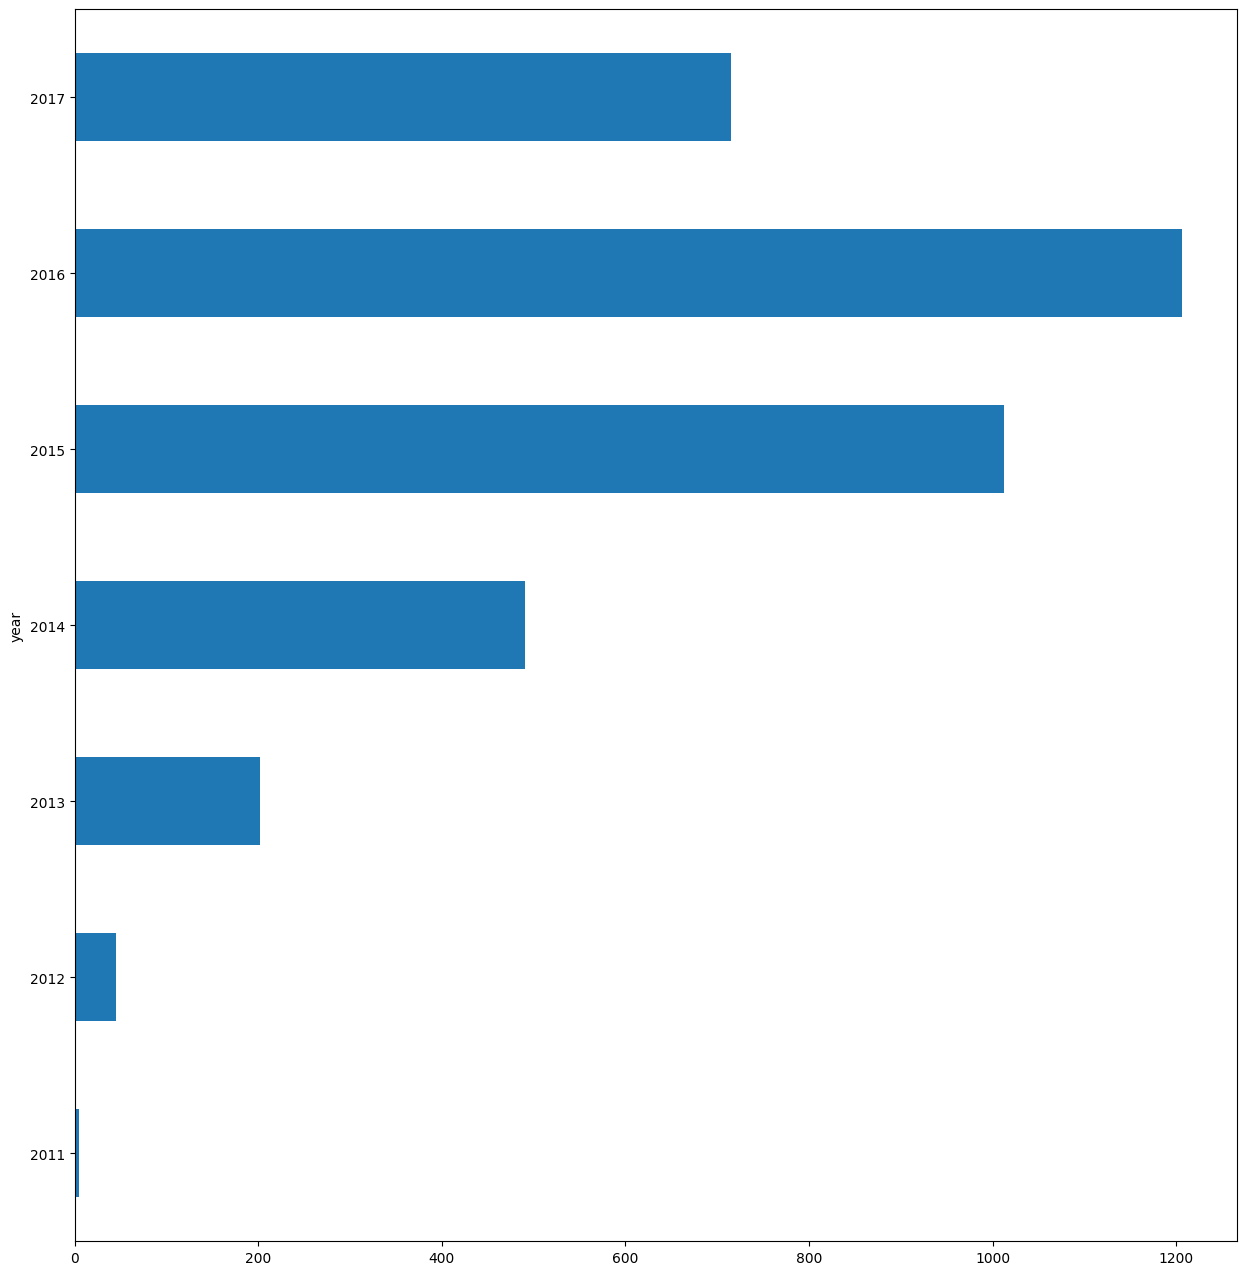

In [25]:

df_cleaned.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

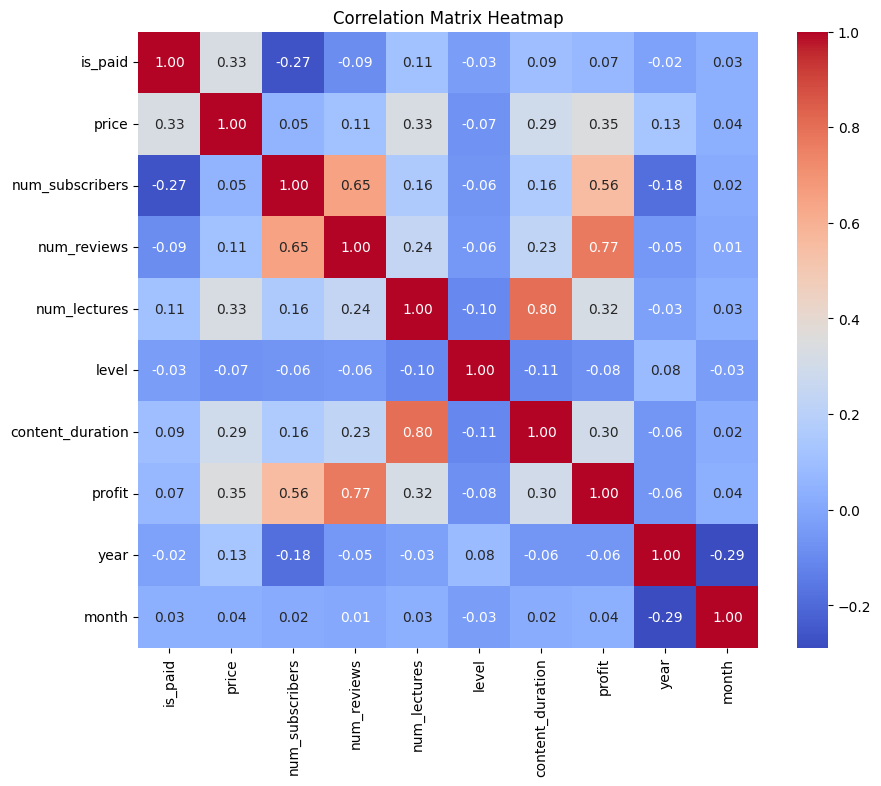

In [26]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [27]:
# reset the indexes to be able to merge the dataframe obtained by handing the the title and subject
df_cv_words=df_cv_words.reset_index(drop=True)
normalized_df=normalized_df.reset_index(drop=True)


df_final = pd.concat([normalized_df,df_cv_words],axis=1)
df_final.tail(20)


,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,profit,year,month,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
3657,1.0,0.100,0.009854,0.002223,0.387097,0.000000,0.196087,0.002180,0.666667,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3658,1.0,0.125,0.010237,0.000364,0.018065,0.000000,0.023820,0.002830,0.666667,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3659,1.0,0.100,0.011100,0.001457,0.029677,0.333333,0.017439,0.002455,0.833333,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3660,1.0,0.500,0.008776,0.000437,0.058065,0.333333,0.042960,0.009705,0.833333,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3661,1.0,0.150,0.003525,0.007032,0.056774,0.000000,0.042960,0.001170,0.833333,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3662,1.0,0.750,0.001458,0.002951,0.076129,0.000000,0.106763,0.002418,0.833333,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3663,1.0,0.225,0.003510,0.000036,0.007742,0.000000,0.011059,0.001747,1.000000,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3664,0.0,0.000,0.271862,0.062525,0.023226,0.000000,0.023820,0.000000,0.166667,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3665,1.0,0.200,0.003265,0.000219,0.005161,0.000000,0.006168,0.001444,0.833333,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3666,1.0,0.150,0.005407,0.000510,0.010323,0.333333,0.004679,0.001794,0.666667,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df_final.describe()

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,profit,year,month,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,...,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000
mean,0.915692,0.330310,0.011892,0.005695,0.046606,0.207234,0.050561,0.009897,0.738555,0.469330,...,0.000369,0.001435,0.000149,0.000128,0.000114,0.000092,0.000149,0.000125,0.000103,0.000112
std,0.277887,0.305047,0.035346,0.034089,0.065014,0.249215,0.077256,0.041187,0.197576,0.307239,...,0.012925,0.026421,0.009057,0.007755,0.006917,0.005552,0.009011,0.007569,0.006248,0.006804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100000,0.000413,0.000146,0.014194,0.000000,0.011059,0.000066,0.666667,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.225000,0.003391,0.000656,0.027097,0.000000,0.023820,0.000949,0.833333,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.475000,0.009471,0.002441,0.054194,0.333333,0.055721,0.004886,0.833333,0.727273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.462606,0.607917,0.549182,0.470226,0.419445,0.336635,0.546387,0.458983,0.378853,0.412595


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3677 entries, 0 to 3676
Columns: 3570 entries, is_paid to zur
dtypes: float64(3570)
memory usage: 100.2 MB


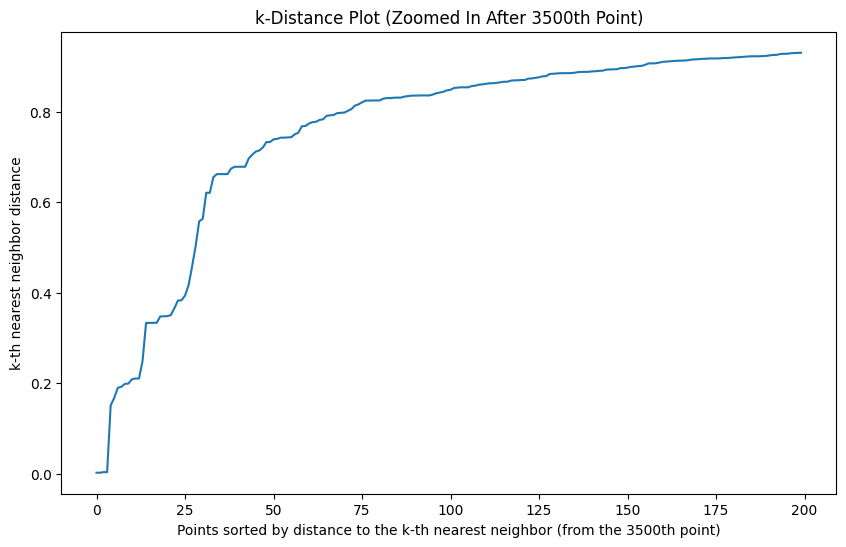

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Example dataset
X =df_final

# Use NearestNeighbors to find the distance to the k-th nearest neighbor
k = 4  # This is the k in the k-distance plot
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Sort distances
sorted_distances = np.sort(distances[:, k-1])

# Create k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_distances[0:200])
plt.xlabel("Points sorted by distance to the k-th nearest neighbor (from the 3500th point)")
plt.ylabel("k-th nearest neighbor distance")
plt.title("k-Distance Plot (Zoomed In After 3500th Point)")
plt.show()


In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=20)

# Fitting the model to the data
dbscan.fit(df_final)

# Cluster labels
labels = dbscan.labels_
unique_labels, counts = np.unique(labels, return_counts=True)

# Print out the counts for each label
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count}")


Cluster -1: 3677


In [32]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)

# Fitting the model to the data
dbscan.fit(df_final)

# Cluster labels
labels = dbscan.labels_
unique_labels, counts = np.unique(labels, return_counts=True)

# Print out the counts for each label
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count}")


Cluster 0: 3677


In [33]:
from sklearn.cluster import KMeans
import numpy as np

# Decide on the number of clusters
n_clusters = 4  # For example, we choose 5 clusters

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(df_final)

# Cluster labels
labels = kmeans.labels_
unique_labels, counts = np.unique(labels, return_counts=True)

# Print out the counts for each label
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count}")

Cluster 0: 658
Cluster 1: 1496
Cluster 2: 310
Cluster 3: 1213


In [34]:
labels

array([0, 1, 3, ..., 3, 3, 3])

In [35]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)
similarity_matrix = cosine_similarity(df_final)

In [36]:
similarity_matrix

array([[1.        , 0.67110364, 0.52314135, ..., 0.50049266, 0.58611825,
        0.50310611],
       [0.67110364, 1.        , 0.56927935, ..., 0.55884192, 0.62006805,
        0.53769206],
       [0.52314135, 0.56927935, 1.        , ..., 0.68101039, 0.65618683,
        0.68861723],
       ...,
       [0.50049266, 0.55884192, 0.68101039, ..., 1.        , 0.69339819,
        0.71187552],
       [0.58611825, 0.62006805, 0.65618683, ..., 0.69339819, 1.        ,
        0.64887953],
       [0.50310611, 0.53769206, 0.68861723, ..., 0.71187552, 0.64887953,
        1.        ]])

In [37]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [38]:
# Get Course ID/Index
course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [39]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [40]:
course_indices['How To Maximize Your Profits Trading Options']

4

In [41]:
idx = course_indices['How To Maximize Your Profits Trading Options']

In [42]:
idx

4

In [43]:
scores = list(enumerate(cosine_sim_mat[idx]))

In [44]:
scores

[(0, 0.06111940145365445),
 (1, 0.04397100826338654),
 (2, 0.07408823858127907),
 (3, 0.055624291691002414),
 (4, 1.0000000000000002),
 (5, 0.11911398376561161),
 (6, 0.12278247066091413),
 (7, 0.09194075510081934),
 (8, 0.2341045262259593),
 (9, 0.052818011362668296),
 (10, 0.10714752456727222),
 (11, 0.2843961223143887),
 (12, 0.048589434307246444),
 (13, 0.08915696039462041),
 (14, 0.16225339575757394),
 (15, 0.044270449335676615),
 (16, 0.050973142774553726),
 (17, 0.1075951970333986),
 (18, 0.24542804636304666),
 (19, 0.07672843191763651),
 (20, 0.1646845412539109),
 (21, 0.13143390180053652),
 (22, 0.14121932198414155),
 (23, 0.061458455272087334),
 (24, 0.041084672777348584),
 (25, 0.04308403292330123),
 (26, 0.04822017093635368),
 (27, 0.036346830899450774),
 (28, 0.03885500190208202),
 (29, 0.13037582492082075),
 (30, 0.17842280859897314),
 (31, 0.037860976450802754),
 (32, 0.03956431511154314),
 (33, 0.19747929613184187),
 (34, 0.0583773650241467),
 (35, 0.21666588696348016),

In [45]:
# Sort our scores per cosine score
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)

In [46]:
# Omit the First Value/itself
sorted_scores[1:]

[(220, 0.4396938506069483),
 (408, 0.4330297400799844),
 (97, 0.4174040117123327),
 (809, 0.38630146999215526),
 (736, 0.38434851444717805),
 (1018, 0.37391482415480837),
 (94, 0.35811793632699984),
 (95, 0.3557410828116205),
 (71, 0.3551705522698771),
 (43, 0.35245429325059596),
 (293, 0.3494005184498614),
 (943, 0.3440840150716771),
 (193, 0.34238414184014226),
 (203, 0.34153873338771745),
 (986, 0.33728880768772457),
 (949, 0.33612907101308065),
 (414, 0.33030735748851237),
 (827, 0.3235506231857765),
 (376, 0.3231433723497015),
 (328, 0.3222475969844972),
 (136, 0.3186547378551755),
 (801, 0.31000468677844917),
 (512, 0.30516513476628365),
 (1146, 0.3049103735088836),
 (442, 0.30276544417453405),
 (152, 0.29684858355245813),
 (645, 0.2937100894141441),
 (713, 0.2903027953177151),
 (896, 0.28902522433773936),
 (68, 0.2868473240808759),
 (11, 0.2843961223143887),
 (59, 0.2832449696202626),
 (800, 0.28157162843307715),
 (1160, 0.2812008991246026),
 (232, 0.27726962524000415),
 (1129, 

In [47]:
# Selected Courses Indices
selected_course_indices = [i[0] for i in sorted_scores[1:]]

In [48]:
selected_course_indices

[220,
 408,
 97,
 809,
 736,
 1018,
 94,
 95,
 71,
 43,
 293,
 943,
 193,
 203,
 986,
 949,
 414,
 827,
 376,
 328,
 136,
 801,
 512,
 1146,
 442,
 152,
 645,
 713,
 896,
 68,
 11,
 59,
 800,
 1160,
 232,
 1129,
 344,
 469,
 367,
 400,
 764,
 952,
 861,
 409,
 564,
 997,
 1000,
 66,
 297,
 351,
 18,
 432,
 158,
 1084,
 831,
 206,
 54,
 842,
 279,
 280,
 283,
 589,
 672,
 674,
 676,
 678,
 875,
 907,
 913,
 918,
 1031,
 1034,
 1045,
 1047,
 1050,
 1108,
 1109,
 1174,
 1179,
 155,
 437,
 8,
 3156,
 72,
 792,
 461,
 531,
 165,
 105,
 454,
 788,
 397,
 796,
 100,
 35,
 49,
 85,
 111,
 743,
 905,
 106,
 361,
 813,
 133,
 694,
 33,
 950,
 107,
 1166,
 508,
 385,
 958,
 648,
 151,
 959,
 272,
 1136,
 364,
 231,
 1117,
 536,
 616,
 695,
 581,
 1131,
 184,
 540,
 583,
 89,
 327,
 359,
 449,
 477,
 48,
 1107,
 707,
 854,
 198,
 821,
 62,
 375,
 44,
 30,
 78,
 75,
 399,
 84,
 46,
 401,
 67,
 300,
 626,
 596,
 775,
 142,
 944,
 650,
 706,
 396,
 702,
 557,
 799,
 354,
 20,
 219,
 147,
 1007,
 1110

In [49]:
# Selected Courses Scores
selected_course_scores = [i[1] for i in sorted_scores[1:]]

In [50]:
recommended_result = df.iloc[selected_course_indices]

In [51]:
rec_df = pd.DataFrame(recommended_result)

In [52]:
rec_df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
220,923184,Pin Bars: The Most Powerful Forex Trading Signal,https://www.udemy.com/make-money-in-forex-usin...,True,200,494,16,19,All Levels,1 hour,2016-08-10T13:10:13Z,Business Finance,98800,2016-08-10,13:10:13Z,2016,8,10
408,877106,"Forex trading tactics, that work!",https://www.udemy.com/forex-trading-tactics-th...,True,20,10,1,5,Beginner Level,36 mins,2016-06-16T20:23:51Z,Business Finance,200,2016-06-16,20:23:51Z,2016,6,16
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0,2017-03-23,22:19:57Z,2017,3,23
809,676764,Create Your Own Automated Stock Trading Robot ...,https://www.udemy.com/automated-trading-excel/,True,150,461,45,44,All Levels,5 hours,2015-12-09T18:35:24Z,Business Finance,69150,2015-12-09,18:35:24Z,2015,12,9
736,1131122,IPO Fundamentals,https://www.udemy.com/ipo-fundamentals-basics-...,True,20,1122,13,6,Beginner Level,1 hour,2017-03-02T00:58:36Z,Business Finance,22440,2017-03-02,00:58:36Z,2017,3,2


In [53]:
rec_df['similarity_scores'] = selected_course_scores

In [54]:
rec_df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,similarity_scores
220,923184,Pin Bars: The Most Powerful Forex Trading Signal,https://www.udemy.com/make-money-in-forex-usin...,True,200,494,16,19,All Levels,1 hour,2016-08-10T13:10:13Z,Business Finance,98800,2016-08-10,13:10:13Z,2016,8,10,0.439694
408,877106,"Forex trading tactics, that work!",https://www.udemy.com/forex-trading-tactics-th...,True,20,10,1,5,Beginner Level,36 mins,2016-06-16T20:23:51Z,Business Finance,200,2016-06-16,20:23:51Z,2016,6,16,0.433030
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0,2017-03-23,22:19:57Z,2017,3,23,0.417404
809,676764,Create Your Own Automated Stock Trading Robot ...,https://www.udemy.com/automated-trading-excel/,True,150,461,45,44,All Levels,5 hours,2015-12-09T18:35:24Z,Business Finance,69150,2015-12-09,18:35:24Z,2015,12,9,0.386301
736,1131122,IPO Fundamentals,https://www.udemy.com/ipo-fundamentals-basics-...,True,20,1122,13,6,Beginner Level,1 hour,2017-03-02T00:58:36Z,Business Finance,22440,2017-03-02,00:58:36Z,2017,3,2,0.384349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,523216,The Fastest Way to Create a Website Using Godaddy,https://www.udemy.com/create-your-own-website/,True,30,1454,14,12,Beginner Level,30 mins,2015-11-09T20:44:25Z,Web Development,43620,2015-11-09,20:44:25Z,2015,11,9,0.000000
3673,270976,A how to guide in HTML,https://www.udemy.com/a-how-to-guide-in-html/,False,0,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development,0,2014-08-10,20:19:10Z,2014,8,10,0.000000
3674,679992,Building Better APIs with GraphQL,https://www.udemy.com/building-better-apis-wit...,True,50,555,89,16,All Levels,2.5 hours,2015-11-29T22:02:02Z,Web Development,27750,2015-11-29,22:02:02Z,2015,11,29,0.000000
3675,330900,Learn Grunt with Examples: Automate Your Front...,https://www.udemy.com/learn-grunt-automate-you...,True,20,496,113,17,All Levels,1 hour,2014-12-19T21:38:54Z,Web Development,9920,2014-12-19,21:38:54Z,2014,12,19,0.000000


In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Assuming you have the following variables defined:
# df - your dataframe containing course titles
# course_indices - a mapping from course titles to their index in the dataframe
# cosine_sim_mat - your precomputed cosine similarity matrix

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

def preprocess_title(title):
    # Tokenize the title
    tokens = word_tokenize(title)
    # Convert to lower case
    tokens = [token.lower() for token in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [56]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

def preprocess_row(row, vectorizer, scaler):
    # Process the title
    processed_tokens = preprocess_title(row['course_title'])
    processed_title = ' '.join(processed_tokens)

    # Transform the title using the pre-fitted TF-IDF vectorizer
    title_tfidf = vectorizer.transform([processed_title]).toarray()

    # Process other features
    row['is_paid'] = 1 if row['is_paid'] else 0
    level_mapping = {'All Levels': 0, 'Beginner Level': 1, 'Intermediate Level': 2, 'Expert Level': 3}
    row['level'] = level_mapping.get(row['level'], 0)
    row['content_duration'] = convert_to_hours(row['content_duration'])  # Assuming convert_to_hours is defined

    # Make sure to create a DataFrame with a single row for scaling
    numeric_features_df = pd.DataFrame([[
        row['is_paid'], 
        row['price'],
        row['num_subscribers'],
        row['num_reviews'],
        row['num_lectures'],
        row['level'], 
        row['content_duration'],
        row['profit'],
        row['year'],
        row['month']
    ]], columns=[
        'is_paid', 
        'price',
        'num_subscribers',
        'num_reviews',
        'num_lectures',
        'level', 
        'content_duration',
        'profit',
        'year',
        'month'
    ])

    # Scale the numeric features
    numeric_features = scaler.transform(numeric_features_df)

    # Combine the title features with the numeric features
    combined_features = np.concatenate((title_tfidf, numeric_features), axis=1)


    return combined_features


In [57]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend_course2(input_row, vectorizer, scaler, num_of_rec=10):
    # Preprocess the input row to get its features
    processed_row = preprocess_row(input_row, vectorizer, scaler)

    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(processed_row, df_final)

    # Get the indices of the top matches
    top_matches_indices = cosine_similarities.argsort().flatten()[-num_of_rec:]

    # Select top recommended courses
    recommended_courses = df.iloc[top_matches_indices]
    recommended_courses['similarity_scores'] = cosine_similarities[0, top_matches_indices]
    
    return recommended_courses
recommend_course2(test_row,tfidf_vect,scaler)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,similarity_scores
353,761808,Learn About Trading Options from a real wallst...,https://www.udemy.com/learn-about-trading-opti...,True,20,1046,17,12,All Levels,1 hour,2016-02-21T22:40:55Z,Business Finance,20920,2016-02-21,22:40:55Z,2016,2,21,0.120783
3268,944156,Javascript :basics for beginners,https://www.udemy.com/learn-javascript-fast/,True,30,1057,22,12,Beginner Level,37 mins,2016-08-29T17:01:28Z,Web Development,31710,2016-08-29,17:01:28Z,2016,8,29,0.122507
3471,948204,Web Building Starter Pack. Html Css and JQuery...,https://www.udemy.com/web-building-starter-pac...,True,30,1033,16,42,All Levels,7.5 hours,2016-10-07T21:58:04Z,Web Development,30990,2016-10-07,21:58:04Z,2016,10,7,0.122507
1879,149716,Learn to Play Fernando Sor's 'Study in B minor...,https://www.udemy.com/learn-popular-piano-succ...,True,115,595,20,33,All Levels,2 hours,2015-02-09T23:14:03Z,Musical Instruments,68425,2015-02-09,23:14:03Z,2015,2,9,0.128189
1950,777650,Drumming for Beginners - Simple Way To Learn H...,https://www.udemy.com/drumming-for-beginners-l...,True,20,1814,28,22,Beginner Level,2 hours,2016-03-02T18:06:21Z,Musical Instruments,36280,2016-03-02,18:06:21Z,2016,3,2,0.137801
703,884658,Investing in Stocks? Master The Art of Covered...,https://www.udemy.com/dont-leave-money-on-the-...,True,80,1095,17,35,All Levels,3 hours,2016-07-28T00:32:48Z,Business Finance,87600,2016-07-28,00:32:48Z,2016,7,28,0.137835
1508,1181652,Photoshop: Automatiza invitaciones con bloc de...,https://www.udemy.com/curso-photoshop-automati...,True,30,86,2,18,All Levels,1.5 hours,2017-04-20T14:26:50Z,Graphic Design,2580,2017-04-20,14:26:50Z,2017,4,20,0.138214
1266,1029554,Formação em Design Gráfico com Corel Draw Vers...,https://www.udemy.com/formacao-design-grafico-...,True,45,418,85,71,Beginner Level,11 hours,2017-03-03T20:08:35Z,Graphic Design,18810,2017-03-03,20:08:35Z,2017,3,3,0.139144
3295,382786,Sass Workflow,https://www.udemy.com/sass-workflow/,False,0,20890,945,21,Beginner Level,3 hours,2015-02-06T15:54:23Z,Web Development,0,2015-02-06,15:54:23Z,2015,2,6,0.148180
808,1023650,Financial Modeling for Professionals in 1 Day!,https://www.udemy.com/financial-modeling-for-p...,True,200,226,12,29,Intermediate Level,4.5 hours,2016-12-05T16:33:34Z,Business Finance,45200,2016-12-05,16:33:34Z,2016,12,5,0.160719


In [58]:
test_row_df.columns

Index(['course_title', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'level', 'content_duration', 'subject', 'profit',
       'year', 'month'],
      dtype='object')

In [59]:

def recommend_course(text,num_of_rec=10):
    def find_best_matches(processed_tokens, df, num_of_rec=10):
        # Combine tokens back to a string
        processed_title = ' '.join(processed_tokens)
        
        # Create a TF-IDF Vectorizer object
        vectorizer = TfidfVectorizer()
        
        # Fit and transform the course titles
        tfidf_matrix = vectorizer.fit_transform(df_cleaned['course_title'])
        
        # Transform the processed title
        processed_tfidf = vectorizer.transform([processed_title])
        
        # Calculate cosine similarity
        cosine_similarities = cosine_similarity(processed_tfidf, tfidf_matrix).flatten()
        
        # Get the top matches indices sorted by similarity score
        top_matches_indices = cosine_similarities.argsort()[-num_of_rec:][::-1]

        # Get the top matches similarity scores
        top_matches_scores = cosine_similarities[top_matches_indices]

        # Create a DataFrame with indices and scores
        top_matches_df = pd.DataFrame({'index': top_matches_indices, 'similarity_score': top_matches_scores})
        
        # Merge the original DataFrame with the top matches DataFrame
        merged_df = top_matches_df.merge(df, left_on='index', right_index=True)
        merged_df = merged_df[merged_df['similarity_score']>0.25]
        
        return merged_df.drop(columns=['index'])
    processed_tokens = preprocess_title(text)
    return find_best_matches(processed_tokens,df,num_of_rec=num_of_rec)

# Example usage:
idx_df = recommend_course("web",  10)
idx_df


,similarity_score,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,0.528173,1023062,Serverless Architecture on Amazon Web Services,https://www.udemy.com/serverless-architecture-...,False,0,13210,978,8,Intermediate Level,33 mins,2016-11-30T00:11:26Z,Web Development,0,2016-11-30,00:11:26Z,2016,11,30
1,0.528173,219838,Learn XML Crash Course: Discover Essential XML...,https://www.udemy.com/learn-xml-crash-course/,True,50,3704,111,18,Intermediate Level,2 hours,2014-06-16T14:00:47Z,Web Development,185200,2014-06-16,14:00:47Z,2014,6,16
2,0.500568,1006894,"React.js: Building Production Ready Apps, Star...",https://www.udemy.com/reactjs-building-product...,True,50,1129,137,77,All Levels,17.5 hours,2016-11-10T23:48:22Z,Web Development,56450,2016-11-10,23:48:22Z,2016,11,10
3,0.482881,63612,1 Hour JavaScript,https://www.udemy.com/1-hour-javascript/,True,200,22999,602,18,Beginner Level,1 hour,2013-07-04T15:27:02Z,Web Development,4599800,2013-07-04,15:27:02Z,2013,7,4
4,0.470998,50522,Become Exceptional in HTML and HTML5,https://www.udemy.com/become-exceptional-in-ht...,True,20,16486,86,34,All Levels,6.5 hours,2014-03-21T08:58:42Z,Web Development,329720,2014-03-21,08:58:42Z,2014,3,21
5,0.468531,910838,The Complete Web Development Tutorial Using Re...,https://www.udemy.com/the-complete-web-develop...,True,40,796,43,29,Intermediate Level,4 hours,2016-07-25T17:16:45Z,Web Development,31840,2016-07-25,17:16:45Z,2016,7,25
6,0.459604,642410,The Complete Bootstrap Masterclass Course - Bu...,https://www.udemy.com/bootstrapcourse/,True,195,24978,540,67,All Levels,7 hours,2015-10-27T20:27:11Z,Web Development,4870710,2015-10-27,20:27:11Z,2015,10,27
7,0.453964,59535,HTML for Beginners,https://www.udemy.com/hmtl5-training/,False,0,8592,336,35,Beginner Level,2.5 hours,2013-07-20T00:52:41Z,Web Development,0,2013-07-20,00:52:41Z,2013,7,20
8,0.451274,851712,The Complete JavaScript Course: Build a Real-W...,https://www.udemy.com/the-complete-javascript-...,True,195,27801,4340,113,All Levels,17.5 hours,2016-10-14T22:52:23Z,Web Development,5421195,2016-10-14,22:52:23Z,2016,10,14
9,0.449357,328476,Complete ASP NET MVC Web Development - Newbie ...,https://www.udemy.com/better-web-development-p...,True,195,6073,627,66,All Levels,9 hours,2014-11-24T21:10:49Z,Web Development,1184235,2014-11-24,21:10:49Z,2014,11,24


In [60]:
recommend_course('web dev',20)

,similarity_score,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,0.459062,916902,The Complete E-Commerce Web Developer Course 5.0,https://www.udemy.com/e-commerce-web-developer...,True,195,3209,58,96,All Levels,12.5 hours,2016-09-13T16:12:58Z,Web Development,625755,2016-09-13,16:12:58Z,2016,9,13
1,0.425031,584786,JavaScript HTML CSS Project make a Quiz Tutorial,https://www.udemy.com/javascript-html-css-proj...,True,95,7130,39,24,All Levels,2 hours,2015-08-18T18:37:17Z,Web Development,677350,2015-08-18,18:37:17Z,2015,8,18
2,0.420975,961996,Learn Reactivex From Ground Up,https://www.udemy.com/learn-reactivex-from-gro...,True,40,207,32,32,Intermediate Level,5 hours,2016-09-22T14:56:51Z,Web Development,8280,2016-09-22,14:56:51Z,2016,9,22


In [61]:
df.to_csv("udemy_courses_clean.csv")

In [62]:
recommend_course('artificial intelligence',20)

,similarity_score,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
